In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

### Importing data

In [2]:
# Data exported as csv from a google spreadsheet
df = pd.read_csv('data/april9-2020.csv')

# Show 1st record
# df.info()

df.shape

(252, 23)

##  Cleaning dataset
- Results by Region
- Results by Country

In [3]:
print('Null records: {}'.format(len(df[df['Region '].isnull()])))

Null records: 0


In [4]:
# Data cleaning: Region

df = df[df['Region '].notna()]
df['Region '].unique()

array(['Africa', 'Africa ', 'Asia', 'Asia ', 'CSA', 'CSA ', 'ECA', 'MENA',
       'North America'], dtype=object)

In [5]:
# Clean Region column
df['Region '].replace({'US':'North America'}, inplace=True)
df['Region '].replace({'CSA ':'CSA'}, inplace=True)
df['Region '].replace({'Asia ':'Asia'}, inplace=True)
df['Region '].replace({'Africa ':'Africa'}, inplace=True)
df['Region '].unique()

array(['Africa', 'Asia', 'CSA', 'ECA', 'MENA', 'North America'],
      dtype=object)

In [6]:
df['Country'].unique()

array(['Kenya', 'Nigeria', 'Niger', 'South Africa', 'DRC', 'Nigeria ',
       'Ethiopia', 'Zimbabwe', 'Cameroon', 'Liberia ', 'Uganda',
       'Liberia', 'Tanzania', 'Kenya ', 'Zambia', "Cote d'Ivoire ",
       'South Korea', 'South Korea ', 'Singapore ', 'Taiwan', 'India ',
       'China ', 'India', 'Thailand', 'Philippines ', 'Malaysia',
       'Bangladesh ', 'Bolivia', 'Brazil', 'Ecuador', 'Colombia',
       'Venezuela', 'Argentina', 'Venezuela ', 'Peru',
       'Dominican Republic', 'Aruba', 'Dominican Republic ', 'Honduras',
       'El Salvador', 'El Salvador ', 'Trinidad & Tobago', 'Cuba',
       'Turkey', 'Russia ', 'Austria', 'Italy', 'Poland', 'Spain',
       'Serbia', 'UK', 'Slovenia', 'Ukraine ', 'Azerbaijan', 'Hungary',
       'Armenia', 'Croatia', 'North Macedonia', 'Bulgaria', 'Bosnia',
       'Moldova', 'Kosovo', 'Russian Federation', 'Iran', 'Iraq', 'Egypt',
       'Jordan', 'Oman', 'Morocco', 'Iraqi Kurdistan', 'Iran ', 'Israel',
       'U.S. ', 'US (Israeli company)',

In [7]:
# Data cleaning: countries
df['Country'].isnull().value_counts()
# df[df['Country'].isnull()]

False    252
Name: Country, dtype: int64

In [8]:
# If needed, edit specific cells with null values in the country column

# df.iloc[11][1] = 'US'
# df.iloc[11]

In [9]:
# Cleaning countries column
df['Country'] = df['Country'].str.strip()

df['Country'].replace({'U.S.':'US'}, inplace=True)
df['Country'].replace({'US (Israeli company)':'US'}, inplace=True)
df['Country'].replace({'Russian Federation':'Russia'}, inplace=True)

list_countries = df['Country'].sort_values().unique()

print(len(list_countries))
print(df['Country'].sort_values().unique())

64
['Argentina' 'Armenia' 'Aruba' 'Austria' 'Azerbaijan' 'Bangladesh'
 'Bolivia' 'Bosnia' 'Brazil' 'Bulgaria' 'Cameroon' 'Canada' 'China'
 'Colombia' "Cote d'Ivoire" 'Croatia' 'Cuba' 'DRC' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Ethiopia' 'Honduras' 'Hungary' 'India'
 'Iran' 'Iraq' 'Iraqi Kurdistan' 'Israel' 'Italy' 'Jordan' 'Kenya'
 'Kosovo' 'Liberia' 'Malaysia' 'Moldova' 'Morocco' 'Niger' 'Nigeria'
 'North Macedonia' 'Oman' 'Peru' 'Philippines' 'Poland' 'Russia' 'Serbia'
 'Singapore' 'Slovenia' 'South Africa' 'South Korea' 'Spain' 'Taiwan'
 'Tanzania' 'Thailand' 'Trinidad & Tobago' 'Turkey' 'UK' 'US' 'Uganda'
 'Ukraine' 'Venezuela' 'Zambia' 'Zimbabwe']


### Cleaned data summary: Region

252 valid records. Distribution by region:


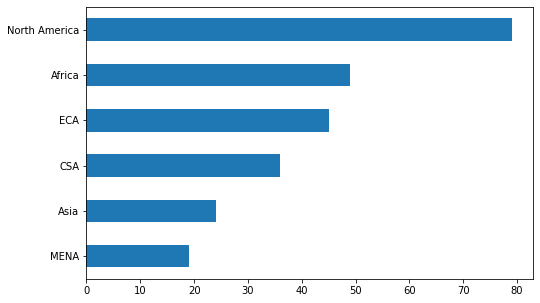

In [10]:
# Number of entries by region
df['Region '] = df['Region '].str.strip()
df['Region '].value_counts().sort_values().plot(kind='barh', figsize=(8,5))
print('{} valid records. Distribution by region:'.format(df['Region '].count()))

### Cleaned data summary: Countries

List of 9 countries out of 64 with more than 5 record in the database


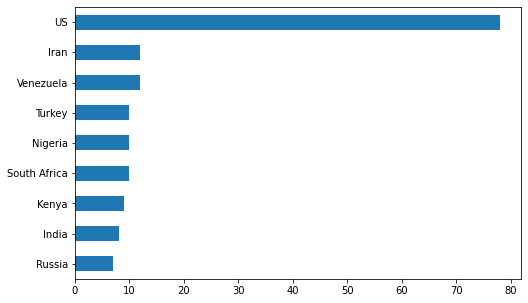

In [11]:
# Number of entries by country
countries = df['Country'].value_counts().sort_values(ascending = False)

i = 5

top_countries = countries[countries > i].sort_values()

top_countries.plot(kind='barh', figsize=(8,5))
print('List of {} countries out of {} with more than {} record in the database'.format(len(top_countries), len(list_countries), i))

### Columns formatting

In [12]:
# Rename columns
df.rename(columns={"Date (M.DD.Y)": "date", 
                   "Mention or use of false news measure (Y/N)": "false_news",
                   "Detained (Y/N)": "detained",
                   "Arrested (Y/N) ": "arrested",
                   "Imprisoned (Y/N) ": "imprisoned",
                   "Access Denied (Y/N)": "access_denied",
                   "Chilling Statement (Y/N)": "chilling_statement",
                   "Attacked (Y/N)": "attacked",
                   "Charged (Y/N) ": "charged",
                   "Online Harassment (Y/N)": "online_harassment",
                   "Threatened (Y/N)": "threatened",
                   "Death (Y/N)": "death",
                   "Criminalization: type of new or amended law (please specify)": "criminalization",
                   "Surveillance (Y/N)" : 'surveillance',
                   "Disinformation or propaganda (Y/N)": "disinformation_propaganda"}, inplace=True)

df.columns

Index(['Region ', 'Country', 'City, Region', 'Description', 'date', 'Link',
       'false_news', 'detained', 'arrested', 'imprisoned', 'access_denied',
       'chilling_statement', 'attacked', 'charged', 'online_harassment',
       'threatened', 'death', 'surveillance', 'criminalization',
       'disinformation_propaganda', 'Censorship', 'Print Media',
       'layoffs/furloughs/closures/salary cuts'],
      dtype='object')

In [13]:
# List of columns to boolean
columns_to_boolean = ['false_news', 
                      'detained', 
                      'arrested', 
                      'imprisoned', 
                      'access_denied',
                      'chilling_statement',
                      'attacked',
                      'charged',
                      'online_harassment',
                      'threatened',
                      'death',
                      'surveillance',
                      'disinformation_propaganda']

In [14]:
def check_uniques_boolean(data, cols):
    for i in cols:
        print('{} : {} ({})'.format(i, data[i].nunique(), data[i].unique()))

In [15]:
check_uniques_boolean(df, columns_to_boolean)

false_news : 1 ([nan 'Y'])
detained : 2 ([nan 'Y' 'N'])
arrested : 2 ([nan 'Y' 'N'])
imprisoned : 2 ([nan 'N' 'Y'])
access_denied : 2 ([nan 'N' 'Y'])
chilling_statement : 3 ([nan 'N' 'Y' 'y'])
attacked : 2 ([nan 'Y' 'N'])
charged : 2 ([nan 'Y' 'N'])
online_harassment : 2 ([nan 'N' 'Y'])
threatened : 2 ([nan 'Y' 'N'])
death : 2 ([nan 'N' 'Y'])
surveillance : 3 (['Y' nan 'N' 'Y '])
disinformation_propaganda : 4 ([nan '?' 'N' 'Y' 'y'])


In [16]:
for i in columns_to_boolean:
    #replace values
    df[i] = df[i].str.strip()
    df[i].replace({'y':'Y'}, inplace=True)
    df[i].replace({'Y(?)':'Y'}, inplace=True)
    df[i].replace({'Y(?)':'Y'}, inplace=True)
    df[i].replace({'?':'N'}, inplace=True)
    
# check again for uniques
check_uniques_boolean(df, columns_to_boolean)
    

false_news : 1 ([nan 'Y'])
detained : 2 ([nan 'Y' 'N'])
arrested : 2 ([nan 'Y' 'N'])
imprisoned : 2 ([nan 'N' 'Y'])
access_denied : 2 ([nan 'N' 'Y'])
chilling_statement : 2 ([nan 'N' 'Y'])
attacked : 2 ([nan 'Y' 'N'])
charged : 2 ([nan 'Y' 'N'])
online_harassment : 2 ([nan 'N' 'Y'])
threatened : 2 ([nan 'Y' 'N'])
death : 2 ([nan 'N' 'Y'])
surveillance : 2 (['Y' nan 'N'])
disinformation_propaganda : 2 ([nan 'N' 'Y'])


In [17]:
# Make columns boolean: 1/0
for i in columns_to_boolean:
    df[i] = df[i].apply(lambda x: 1 if x =='Y' else 0).astype('int32')
    
df[columns_to_boolean].nunique()

false_news                   2
detained                     2
arrested                     2
imprisoned                   2
access_denied                2
chilling_statement           2
attacked                     2
charged                      2
online_harassment            2
threatened                   2
death                        2
surveillance                 2
disinformation_propaganda    2
dtype: int64

In [18]:
# PENDING: dates formatting
# df.date.unique()

### Sumary: additional classification

In [22]:
#Summary of values in boolean columns
tags = df[columns_to_boolean].apply(pd.Series.value_counts).T
tags[1].sort_values(ascending = False)

false_news                   33
surveillance                 25
detained                     23
attacked                     22
threatened                   19
chilling_statement           17
arrested                     16
disinformation_propaganda     9
access_denied                 9
online_harassment             8
charged                       7
imprisoned                    4
death                         1
Name: 1, dtype: int64

Number of records with additional classification:


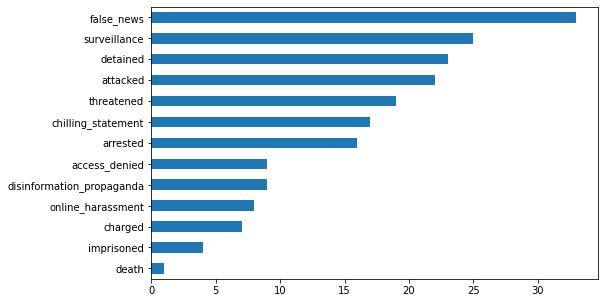

In [23]:
#Summary of values in boolean columns
tags = df[columns_to_boolean].apply(pd.Series.value_counts).T
print("Number of records with additional classification:")
tags[1].sort_values(ascending = False)
tags[1].sort_values(ascending = False).sort_values().plot(kind='barh', figsize=(8,5))

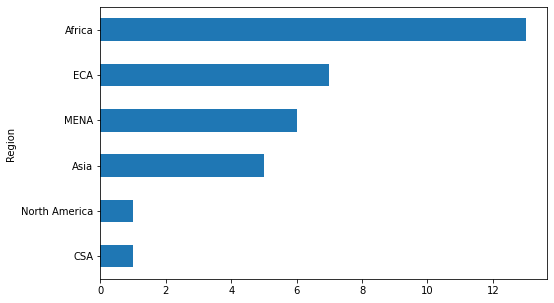

In [24]:
regions_false_news = df.loc[df['false_news'] == 1]

regions_false_news.groupby(['Region '])['false_news'].count().sort_values().plot(kind='barh', figsize=(8,5))

## Functions
- Filter by one or two columns, print summary data & table
- Calculate all combinations of boolean variables

In [25]:
# Filter data by one column
def filter_by_column(data, col):
    table = data.loc[data[col] == 1]
    
#     pd.set_option('display.max_colwidth', -1)
    
    print('\nThere are {} records classified as {}:\n'.format(len(table), col))
    print(table[['Country', 'Link']])
    
    print('\nDistribution by region')
    table['Region '].value_counts().plot(kind='barh', figsize=(8,5))
    

In [26]:
# Filter data by two columns
def filter_by_two_columns(data, col1, col2):
    table = data.loc[(data[col1] == 1) & (data[col2] == 1)]
    try:
        print('\nThere are {} records classified as {} and {}:\n'.format(len(table), col1, col2))
        print(table[['Country', 'Link']])  
#         print('\nDistribution by country')
#         table['Country'].value_counts().plot(kind='barh', figsize=(10,5))
    
    except IndexError:
        print('No results')
        pass


### Summary: disinformation_propaganda


There are 9 records classified as disinformation_propaganda:

     Country                                               Link
57     China  https://www.propublica.org/article/how-china-b...
59    Taiwan  https://bulletin.tfd.org.tw/tdb-vol-4-no-1-tai...
73   Bolivia  https://www.lavanguardia.com/politica/20200318...
119  Ukraine  https://www.buzzfeednews.com/article/christoph...
120   Russia  https://www.theguardian.com/world/2020/mar/18/...
123  Armenia  https://eurasianet.org/armenia-takes-hard-line...
183       US  https://apnews.com/7edbc93627b1040a422f2d07f50...
195       US  https://www.journalism.org/2020/03/18/american...
220       US  https://www.nytimes.com/2020/03/28/us/testing-...

Distribution by region


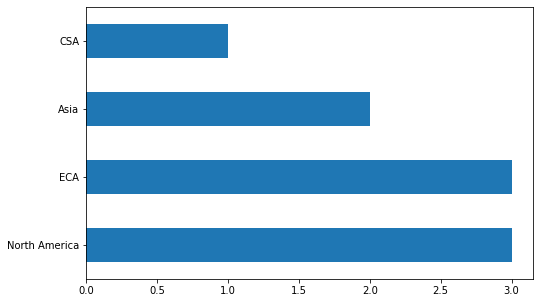

In [27]:
filter_by_column(df, 'disinformation_propaganda')


There are 25 records classified as surveillance:

          Country                                               Link
0           Kenya  https://www.standardmedia.co.ke/article/200136...
1           Kenya  https://www.standardmedia.co.ke/health/article...
46   South Africa  https://www.bloomberg.com/news/articles/2020-0...
49    South Korea  https://www.technologyreview.com/s/615329/coro...
50    South Korea  https://www.washingtonpost.com/world/asia_paci...
51    South Korea  https://www.wsj.com/articles/how-china-slowed-...
54      Singapore  https://www.wsj.com/articles/how-china-slowed-...
55         Taiwan  https://www.wsj.com/articles/how-china-slowed-...
73        Bolivia  https://www.lavanguardia.com/politica/20200318...
74         Brazil  https://www.uol.com.br/tilt/noticias/redacao/2...
75        Ecuador  https://twitter.com/usuariosdigital/status/124...
106      Honduras  https://www.coindesk.com/as-governments-rush-t...
110        Russia   https://news.trust.org/item/2020

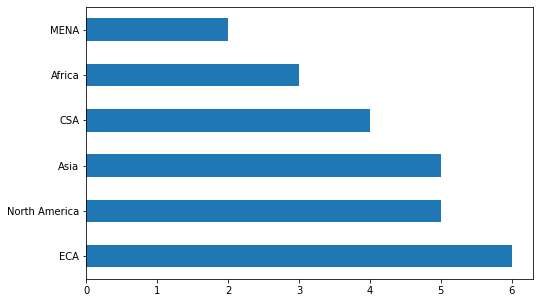

In [28]:
filter_by_column(df, 'surveillance')


There are 33 records classified as false_news:

                Country                                               Link
2               Nigeria  https://www.legit.ng/1298893-coronavirus-court...
3                 Niger  https://twitter.com/CPJAfrica/status/123848961...
4                 Kenya  https://www.africanews.com/2020/03/16/media-wa...
6          South Africa  https://twitter.com/Dariomilo/status/124038234...
7                 Kenya  https://www.nation.co.ke/news/Alai-faces-court...
12             Ethiopia  https://twitter.com/befeqe/status/124356075819...
14             Zimbabwe  https://www.thestandard.co.zw/2020/03/29/20-ye...
27               Uganda  https://www.pmldaily.com/news/2020/03/breaking...
31              Nigeria  https://www.premiumtimesng.com/news/top-news/3...
33              Liberia  https://frontpageafricaonline.com/news/liberia...
34             Tanzania                                       Jamii Forums
41         South Africa  https://www.gov.za/documen

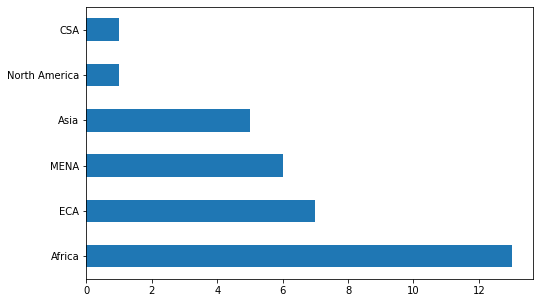

In [29]:
filter_by_column(df, 'false_news')

In [30]:
# Filter data by two columns
filter_by_two_columns(df, 'disinformation_propaganda', 'false_news')


There are 3 records classified as disinformation_propaganda and false_news:

     Country                                               Link
59    Taiwan  https://bulletin.tfd.org.tw/tdb-vol-4-no-1-tai...
119  Ukraine  https://www.buzzfeednews.com/article/christoph...
123  Armenia  https://eurasianet.org/armenia-takes-hard-line...


## Test: Clustering

In [31]:
# columns with boolean values
d = df[columns_to_boolean]


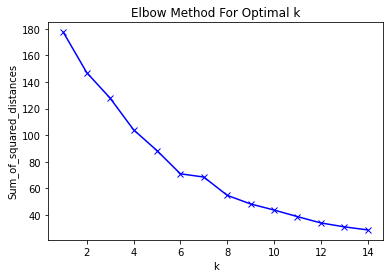

In [32]:
# Determining the number of clusters in the dataset
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(d)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Hierarchical clustering

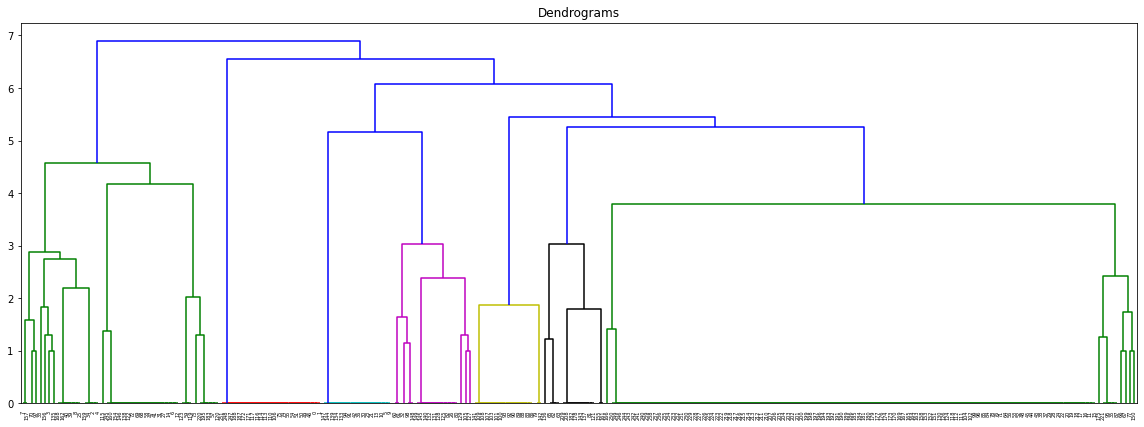

In [33]:
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(d, method='ward'))

### K-means clustering

In [34]:
#Create clusters
n = 6
clusters = KMeans(n_clusters=n)

# Fit clusterer
clusters.fit(d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
df['group'] = clusters.predict(d)

In [36]:
df.group.unique()

array([4, 0, 5, 1, 2, 3], dtype=int32)

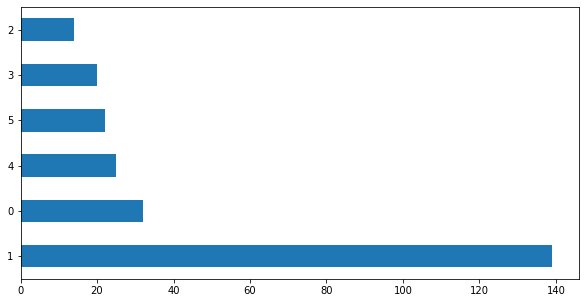

In [39]:
df.group.value_counts().plot(kind='barh', figsize=(10,5))

In [ ]:
# df[(df['group'] == 4)]